In [791]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the data

In [792]:
df = pd.read_csv('../data/housing_NL.csv')

In [793]:
df.head()

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,€ 525.000,251 m²,135 m²,1972,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,€ 425.000,181 m²,109 m²,1935,Bestaande bouw,"Herenhuis, geschakelde 2-onder-1-kapwoning",Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,€ 575.000,198 m²,138 m²,1986,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,€ 259.500,231 m²,92 m²,1989,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,€ 1.050.000,423 m²,210 m²,2000,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340


## Data Cleaning

Rename the column name into lowercase

In [794]:
def standardize_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ','_')
    
    return df

In [795]:
standardize_column_names(df)
df.head()

,address,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,roof,rooms,toilet,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
0,Bovenweg 223,Sint Pancras,€ 525.000,251 m²,135 m²,1972,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,€ 425.000,181 m²,109 m²,1935,Bestaande bouw,"Herenhuis, geschakelde 2-onder-1-kapwoning",Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,€ 575.000,198 m²,138 m²,1986,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,€ 259.500,231 m²,92 m²,1989,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,€ 1.050.000,423 m²,210 m²,2000,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340


Data exploration

In [796]:
def data_exploration(df):

    # check number of rows and columns
    shape = df.shape
    print("Number of rows:", shape[0])
    print("Number of columns:", shape[1])

    # check duplicates
    check_duplicates = df.duplicated().sum()
    print("Number of duplicates:", check_duplicates)

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
                        'Column': df.columns,
                        'Data Type': df.dtypes,
                        'Non-Null Count': df.notnull().sum(),
                        'Missing Values': df.isnull().sum(),
                        'Unique Values': df.nunique()
                })

    # Reset index to make 'Column' a regular column
    summary_df.reset_index(drop=True, inplace=True)

    # Display the summary DataFrame
    summary_df
    
    # check numerical columns
    numerical_columns = df.select_dtypes("number").columns
    print("\nNumerical Columns:", numerical_columns)

    # check categorical columns
    categorical_columns = df.select_dtypes("object").columns
    print("\nCategorical Columns:", categorical_columns)

    return summary_df

In [797]:
data_exploration(df)

Number of rows: 5555
Number of columns: 16
Number of duplicates: 0

Numerical Columns: Index([], dtype='object')

Categorical Columns: Index(['address', 'city', 'price', 'lot_size_(m2)', 'living_space_size_(m2)',
       'build_year', 'build_type', 'house_type', 'roof', 'rooms', 'toilet',
       'floors', 'energy_label', 'position', 'garden',
       'estimated_neighbourhood_price_per_m2'],
      dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,address,object,5555,0,5472
1,city,object,5555,0,1075
2,price,object,5555,0,545
3,lot_size_(m2),object,5555,0,1226
4,living_space_size_(m2),object,5555,0,344
5,build_year,object,5471,84,317
6,build_type,object,5555,0,2
7,house_type,object,5555,0,107
8,roof,object,5555,0,88
9,rooms,object,5555,0,77


Drop mising values

In [798]:
df = df.dropna()

In [799]:
df.isnull().sum()

address                                 0
city                                    0
price                                   0
lot_size_(m2)                           0
living_space_size_(m2)                  0
build_year                              0
build_type                              0
house_type                              0
roof                                    0
rooms                                   0
toilet                                  0
floors                                  0
energy_label                            0
position                                0
garden                                  0
estimated_neighbourhood_price_per_m2    0
dtype: int64

Perhaps we dont need to map it based on province because then it becomes too general when someone wants to enter a new data based on city.

Check unique values 

In [800]:
df['build_type'].value_counts()

build_type
Bestaande bouw    4952
Nieuwbouw            2
Name: count, dtype: int64

In [801]:
df['house_type'].value_counts()

house_type
Eengezinswoning, tussenwoning                                            1425
Eengezinswoning, vrijstaande woning                                       750
Eengezinswoning, 2-onder-1-kapwoning                                      741
Eengezinswoning, hoekwoning                                               539
Villa, vrijstaande woning                                                 295
Eengezinswoning, geschakelde woning                                       138
Eengezinswoning, eindwoning                                               123
Eengezinswoning, geschakelde 2-onder-1-kapwoning                          104
Woonboerderij, vrijstaande woning                                          98
Herenhuis, tussenwoning                                                    84
Eengezinswoning, halfvrijstaande woning                                    69
Herenhuis, vrijstaande woning                                              61
Landhuis, vrijstaande woning                         

In [802]:
df[['house_type','house_type_detail']] = df['house_type'].str.split(', ', n=1, expand=True)

In [803]:
# put the house_type_detail next to house_type column

# Get the list of columns
cols = list(df.columns)

# Move house_type_detail next to house_type
house_type_idx = cols.index('house_type')
cols.insert(house_type_idx + 1, cols.pop(cols.index('house_type_detail')))

# Reorder the DataFrame
df = df[cols]

df.head()

,address,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
1,Julianastraat 19,Waddinxveen,€ 425.000,181 m²,109 m²,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,€ 575.000,198 m²,138 m²,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,€ 259.500,231 m²,92 m²,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,€ 1.050.000,423 m²,210 m²,2000,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340
5,Tol 4,Oudewater,€ 445.000,127 m²,126 m²,2016,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,A,In woonwijk,Achtertuin en voortuin,1.745


Change data format and type of price, lot_size, living_space, estimated_price

In [804]:
def clean_numerical(df, column_name, symbol):
    
    column = df[column_name]
    
    cleaned_column = column.str.replace(symbol, '', regex=False).str.replace('m²', '', regex=False).str.replace(' ', '').str.replace('.', '').str.replace(',', '')
    return pd.to_numeric(cleaned_column, errors='coerce').astype('Int64')

In [805]:
df[df['price'] == 'Prijs op aanvraag'].value_counts()

address                              city              price              lot_size_(m2)  living_space_size_(m2)  build_year  build_type      house_type       house_type_detail    roof                                          rooms                      toilet                            floors                       energy_label    position                                                                                     garden                                        estimated_neighbourhood_price_per_m2
Boschweg 75 + 75a                    Schijndel         Prijs op aanvraag  525 m²         227 m²                  1929        Bestaande bouw  Eengezinswoning  2-onder-1-kapwoning  Plat dak bedekt met bitumineuze dakbedekking  6 kamers (2 slaapkamers)   1 badkamer en 1 apart toilet      2 woonlagen                  F               Aan drukke weg, in centrum en open ligging                                                   Achtertuin                                    2.340                  

In [806]:
df = df[df['price'] != 'Prijs op aanvraag']

In [807]:
df = df[df['price'] != ' 292125 von']

In [808]:
df = df[~df['price'].str.contains('Prijs op aanvraag|von', na=False)]

In [809]:
df['price'] = clean_numerical(df, 'price', '€')

In [810]:
df['lot_size_(m2)'] = clean_numerical(df, 'lot_size_(m2)', 'm2')

In [811]:
df['living_space_size_(m2)'] = clean_numerical(df, 'living_space_size_(m2)', 'm2')

In [812]:
df['estimated_neighbourhood_price_per_m2'] = clean_numerical(df, 'estimated_neighbourhood_price_per_m2', '€')

In [813]:
df.dtypes

address                                 object
city                                    object
price                                    Int64
lot_size_(m2)                            Int64
living_space_size_(m2)                   Int64
build_year                              object
build_type                              object
house_type                              object
house_type_detail                       object
roof                                    object
rooms                                   object
toilet                                  object
floors                                  object
energy_label                            object
position                                object
garden                                  object
estimated_neighbourhood_price_per_m2     Int64
dtype: object

Split bathroom and toilet

In [814]:
df['toilet'].value_counts()

toilet
1 badkamer en 1 apart toilet         3268
2 badkamers en 1 apart toilet         537
1 badkamer en 2 aparte toiletten      505
1 badkamer                            239
2 badkamers en 2 aparte toiletten     191
2 badkamers                            70
3 badkamers en 1 apart toilet          52
3 badkamers en 2 aparte toiletten      29
2 badkamers en 3 aparte toiletten      18
1 badkamer en 3 aparte toiletten        9
3 badkamers                             6
4 badkamers en 2 aparte toiletten       5
3 badkamers en 3 aparte toiletten       5
4 badkamers en 1 apart toilet           5
2 badkamers en 4 aparte toiletten       2
5 badkamers en 1 apart toilet           2
6 badkamers en 1 apart toilet           1
4 badkamers en 3 aparte toiletten       1
7 badkamers en 1 apart toilet           1
3 badkamers en 4 aparte toiletten       1
Name: count, dtype: int64

In [815]:
df['bathroom'] = df['toilet'].str.extract(r'(\d+)')[0].astype(float).fillna(0).astype(np.int64)

In [816]:
df['toilet'] = df['toilet'].str.extract(r'(?:\d+.*?)(\d+)')[0].astype(float).fillna(0).astype(np.int64)

In [817]:
# Move bathroom column next to toilet column

# Get the list of columns
cols = list(df.columns)


bathroom_idx = cols.index('toilet')
cols.insert(bathroom_idx + 1, cols.pop(cols.index('bathroom')))

# Reorder the DataFrame
df = df[cols]

df.head()

,address,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
1,Julianastraat 19,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
2,Kuipersgilde 3,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855
3,De Kamp 1 A,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190
4,Wildrijklaan 8,Sassenheim,1050000,423,210,2000,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2,2,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1340
5,Tol 4,Oudewater,445000,127,126,2016,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,5 kamers (4 slaapkamers),1,1,3 woonlagen,A,In woonwijk,Achtertuin en voortuin,1745


In [818]:
df['rooms'] = df['rooms'].str.extract(r'(?:\d+.*?)(\d+)')[0].astype(float).fillna(0).astype(np.int64)

In [819]:
df = df.drop(columns='address')

In [820]:
df = df[df['build_year'] != 'Voor 1906']

In [821]:
df = df[df['build_year'] != 'Na 2020']

In [822]:
# Remove any non-numeric characters (except '.')
df['build_year'] = df['build_year'].replace(r'[^\d.]', '', regex=True)
df['build_year'] = df['build_year'].astype(float).astype(np.int64)


In [823]:
df.dtypes

city                                    object
price                                    Int64
lot_size_(m2)                            Int64
living_space_size_(m2)                   Int64
build_year                               int64
build_type                              object
house_type                              object
house_type_detail                       object
roof                                    object
rooms                                    int64
toilet                                   int64
bathroom                                 int64
floors                                  object
energy_label                            object
position                                object
garden                                  object
estimated_neighbourhood_price_per_m2     Int64
dtype: object

In [824]:
df = df.dropna()

In [825]:

df = df[df['energy_label'] != 'Niet verplicht']

In [826]:
df.head()

,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
1,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
2,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855
3,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190
4,Sassenheim,1050000,423,210,2000,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Schilddak bedekt met pannen,5,2,2,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1340
5,Oudewater,445000,127,126,2016,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,4,1,1,3 woonlagen,A,In woonwijk,Achtertuin en voortuin,1745


In [827]:
# Dictionary to map cities/towns to their respective provinces in the Netherlands 
provinces = { 
    "Drenthe": [ "Assen", "Beilen", "Coevorden", "Dalen", "Dwingeloo", "Eelde", "Emmen", "Gasselte", "Havelte", "Meppel", "Nieuw-Dordrecht", "Nieuw-Schoonebeek", "Noord-Sleen", "Ruinen (Gem. De Wolden)", "Schoonoord", "Smilde", "Sleen", "Tynaarlo", "Valthermond", "Westerbork", "Zuidlaren", "Zwiggelte" ], 
    "Flevoland": [ "Almere", "Dronten", "Emmeloord", "Lelystad", "Zeewolde" ], 
    "Friesland": [ "Augustinusga", "Bolsward", "Drachten", "Franeker", "Goutum", "Grou", "Harlingen", "Heerenveen", "Hindeloopen", "Jirnsum", "Leeuwarden", "Makkum", "Nijland", "Oosterwolde (FR)", "Sneek", "St.-Annaparochie", "Woudsend" ], 
    "Gelderland": [ "Aalten", "Almen", "Apeldoorn", "Arnhem", "Beekbergen", "Bennekom", "Bemmel", "Borculo", "Bredevoort", "Brummen", "Culemborg", "Dieren", "Dinxperlo", "Doetinchem", "Druten", "Ede", "Elburg", "Elst (GE)", "Epe", "Ermelo", "Geldermalsen", "Gorssel", "Harderwijk", "Hattem", "Hedel", "Heerde", "Hengelo (GE)", "Huissen", "Hummelo", "Kesteren", "Klarenbeek (Gem. Voorst)", "Lichtenvoorde", "Lochem", "Lunteren", "Malden", "Nijkerk", "Nijkerkerveen", "Nijmegen", "Nunspeet", "Ochten", "Oosterbeek", "Otterlo", "Pannerden", "Putten", "Rozendaal", "Tiel", "Twello", "Vaassen", "Varsseveld", "Velp (GE)", "Wageningen", "Warnsveld", "Wehl", "Westervoort", "Wijchen", "Winterswijk", "Zaltbommel", "Zutphen" ], 
    "Groningen": [ "Bedum", "Delfzijl", "Eemshaven", "Groningen", "Haren (GR)", "Hoogezand", "Meeden", "Musselkanaal", "Nieuwe Pekela", "Nieuwe Statenzijl", "Scheemda", "Slochteren", "Stadskanaal", "Uithuizen", "Winsum" ], 
    "Limburg": [ "Beek", "Brunssum", "Eijsden", "Geleen", "Gennep", "Heerlen", "Helden", "Hoensbroek", "Horn", "Kerkrade", "Landgraaf", "Maastricht", "Meerssen", "Montfort", "Nederweert", "Roermond", "Sevenum", "Sittard", "Stein", "Susteren", "Tegelen", "Valkenburg (LI)", "Venlo", "Venray", "Weert" ], 
    "Noord-Brabant": [ "Aarle-Rixtel", "Achtmaal", "Alphen (GE)", "Baarle-Nassau", "Best", "Bergen op Zoom", "Boxtel", "Breda", "Cuijk", "Den Bosch", "Deurne", "Dongen", "Drunen", "Eersel", "Etten-Leur", "Geldrop", "Gilze", "Goirle", "Grave", "Haaren", "Halsteren", "Heeze", "Helmond", "Heusden (Gem. Heusden)", "Hilvarenbeek", "Hoogerheide", "'s-Hertogenbosch", "Hoogstraten", "Huijbergen", "Klundert", "Made", "Nistelrode", "Oirschot", "Oisterwijk", "Oss", "Raamsdonksveer", "Rijen", "Roosendaal", "Rosmalen", "Sint-Oedenrode", "Someren", "Steenbergen (NB)", "Tilburg", "Uden", "Valkenswaard", "Veghel", "Veldhoven", "Vlijmen", "Vught", "Waalwijk", "Wouw", "Zevenbergen" ], 
    "Noord-Holland": [ "Aalsmeer", "Alkmaar", "Amstelveen", "Amsterdam", "Andijk", "Assendelft", "Badhoevedorp", "Beemster", "Beverwijk", "Blaricum", "Bloemendaal", "Bussum", "Castricum", "Den Helder", "Diemen", "Edam", "Enkhuizen", "Haarlem", "Heemskerk", "Heemstede", "Heerhugowaard", "Hilversum", "Hoofddorp", "Hoorn (NH)", "Huizen", "IJmuiden", "Kortenhoef", "Laren (NH)", "Limmen", "Medemblik", "Monnickendam", "Naarden", "Oostzaan", "Ouderkerk aan de Amstel", "Purmerend", "Schagen", "Schoorl", "Uithoorn", "Volendam", "Wijk aan Zee", "Wormerveer", "Zaandam", "Zandvoort" ], 
    "Overijssel": [ "Almelo", "Bathmen", "Borne", "Dalfsen", "Deventer", "Diepenheim", "Enschede", "Goor", "Hardenberg", "Hasselt", "Hengelo (OV)", "Kampen", "Nijverdal", "Oldenzaal", "Ommen", "Raalte", "Rijssen", "Steenwijk", "Tubbergen", "Vriezenveen", "Vroomshoop", "Wierden", "Zwolle" ], 
    "Utrecht": [ "Amersfoort", "Baarn", "Bilthoven", "Breukelen", "Bunnik", "Cothen", "De Meern", "Doorn", "Driebergen-Rijsenburg", "Houten", "IJsselstein", "Leusden", "Loenen aan de Vecht", "Maarssen", "Mijdrecht", "Montfoort", "Nieuwegein", "Oudewater", "Renswoude", "Rhenen", "Soest", "Utrecht", "Veenendaal", "Vianen (UT)", "Woerden", "Zeist" ], 
    "Zeeland": [ "Aardenburg", "Axel", "Breskens", "Cadzand", "Domburg", "Goes", "Hulst", "Kapelle", "Koudekerke", "Middelburg", "Oostburg", "Renesse", "Serooskerke (Gem. Veere)", "Sluis", "Terneuzen", "Vlissingen", "Yerseke", "Zierikzee" ], 
    "Zuid-Holland": [ "Alblasserdam", "Alphen aan den Rijn", "Barendrecht", "Berkel en Rodenrijs", "Bodegraven", "Boskoop", "Capelle aan den IJssel", "Delft", "Den Haag", "Dordrecht", "Gouda", "Hillegom", "Katwijk (ZH)", "Krimpen aan den IJssel", "Leerdam", "Leiden", "Leiderdorp", "Lisse", "Maassluis", "Monster", "Nieuw-Lekkerland", "Nieuwerkerk aan den IJssel", "Noordwijk (ZH)", "Oegstgeest", "Oud-Beijerland", "Papendrecht", "Pijnacker", "Rhoon", "Ridderkerk", "Rijswijk (ZH)", "Rotterdam", "Sassenheim","Schiedam", "Schoonhoven", "Sliedrecht", "Spijkenisse", "Stellendam", "Vlaardingen", "Voorburg", "Voorschoten", "Wassenaar", "Waddinxveen", "Wassenaar", "Westland", "Zoetermeer", "Zwijndrecht" ] }

In [828]:
# # Create a reverse mapping dictionary
# city_to_province = {city: province for province, cities in provinces.items() for city in cities}

# # Map the 'city' column to 'provinces'
# df['province'] = df['city'].map(city_to_province)

In [829]:
#df["province"].isnull().sum()

Too much to handle. So, cancel the plan to add province

In [830]:
# nan_provinces_df = df[df['province'].isna()]
# nan_provinces_df['city'].to_csv('../data/city_NaN.csv')

In [831]:
df.dtypes

city                                    object
price                                    Int64
lot_size_(m2)                            Int64
living_space_size_(m2)                   Int64
build_year                               int64
build_type                              object
house_type                              object
house_type_detail                       object
roof                                    object
rooms                                    int64
toilet                                   int64
bathroom                                 int64
floors                                  object
energy_label                            object
position                                object
garden                                  object
estimated_neighbourhood_price_per_m2     Int64
dtype: object

In [832]:
# Convert Int64 columns to float64
int64_columns = df.select_dtypes(include='Int64').columns

df[int64_columns] = df[int64_columns].astype('int64')

In [833]:
df.dtypes

city                                    object
price                                    int64
lot_size_(m2)                            int64
living_space_size_(m2)                   int64
build_year                               int64
build_type                              object
house_type                              object
house_type_detail                       object
roof                                    object
rooms                                    int64
toilet                                   int64
bathroom                                 int64
floors                                  object
energy_label                            object
position                                object
garden                                  object
estimated_neighbourhood_price_per_m2     int64
dtype: object

In [834]:
df.shape

(4876, 17)

In [835]:
df.to_csv('../data/df_cleaned.csv')

In [836]:
df['house_type'].value_counts()

house_type
Eengezinswoning    3978
Villa               316
Herenhuis           268
Bungalow            153
Woonboerderij       102
Landhuis             53
Grachtenpand          5
Woonboot              1
Name: count, dtype: int64

In [837]:
df['house_type_detail'].value_counts()

house_type_detail
tussenwoning                                            1500
vrijstaande woning                                      1270
2-onder-1-kapwoning                                      805
hoekwoning                                               569
geschakelde woning                                       183
eindwoning                                               131
geschakelde 2-onder-1-kapwoning                          116
halfvrijstaande woning                                    84
vrijstaande woning (semi-bungalow)                        37
tussenwoning (drive-in woning)                            29
tussenwoning (split-level woning)                         17
vrijstaande woning (dijkwoning)                           14
geschakelde woning (semi-bungalow)                        11
tussenwoning (hofjeswoning)                               10
vrijstaande woning (split-level woning)                    8
vrijstaande woning (bedrijfs- of dienstwoning)             7
gescha

In [838]:
df['roof'].value_counts().head(10)

roof
Zadeldak bedekt met pannen                                        2774
Plat dak bedekt met bitumineuze dakbedekking                       441
Samengesteld dak bedekt met bitumineuze dakbedekking en pannen     224
Samengesteld dak bedekt met pannen                                 214
Schilddak bedekt met pannen                                        158
Dwarskap bedekt met pannen                                         140
Zadeldak bedekt met bitumineuze dakbedekking en pannen             125
Plat dak                                                           125
Mansarde dak bedekt met pannen                                     111
Lessenaardak bedekt met pannen                                      89
Name: count, dtype: int64

In [839]:
df['garden'].value_counts().head(10)

garden
Achtertuin en voortuin                          2316
Achtertuin, voortuin en zijtuin                  754
Tuin rondom                                      635
Achtertuin                                       629
Achtertuin, voortuin en zonneterras               76
Achtertuin, voortuin, zijtuin en zonneterras      66
Achtertuin, tuin rondom, voortuin en zijtuin      63
Achtertuin en zijtuin                             60
Voortuin en zijtuin                               31
Tuin rondom en zonneterras                        31
Name: count, dtype: int64

In [840]:
df['position'].value_counts()

position
Aan rustige weg en in woonwijk                                                                                                                  1455
In woonwijk                                                                                                                                      815
Aan rustige weg, in woonwijk en vrij uitzicht                                                                                                    225
Aan rustige weg, beschutte ligging en in woonwijk                                                                                                188
In centrum                                                                                                                                       133
In woonwijk en vrij uitzicht                                                                                                                     111
Aan rustige weg, in bosrijke omgeving en in woonwijk                                             

Check correlation between categorical variables to the estimated_neighbourhood_price_per_m2

In [841]:
def correlation_numerical(df, column_name_numerical_1, column_name_numerical_2):
    
    # Pearson method
    correlation_P = df[column_name_numerical_1].corr(df[column_name_numerical_2])

    # Spearman method
    correlation_S = df[column_name_numerical_1].corr(df[column_name_numerical_2], method='spearman')

    print("Pearson's correlation :", correlation_P)
    print("Spearman's correlation :", correlation_S)

In [842]:
correlation_numerical(df, 'price', 'lot_size_(m2)')

Pearson's correlation : 0.3396823955231201
Spearman's correlation : 0.5359633328118457


In [843]:
correlation_numerical(df, 'price', 'living_space_size_(m2)')

Pearson's correlation : 0.7303711936617624
Spearman's correlation : 0.7391285588239215


### Correlation between numerical columns

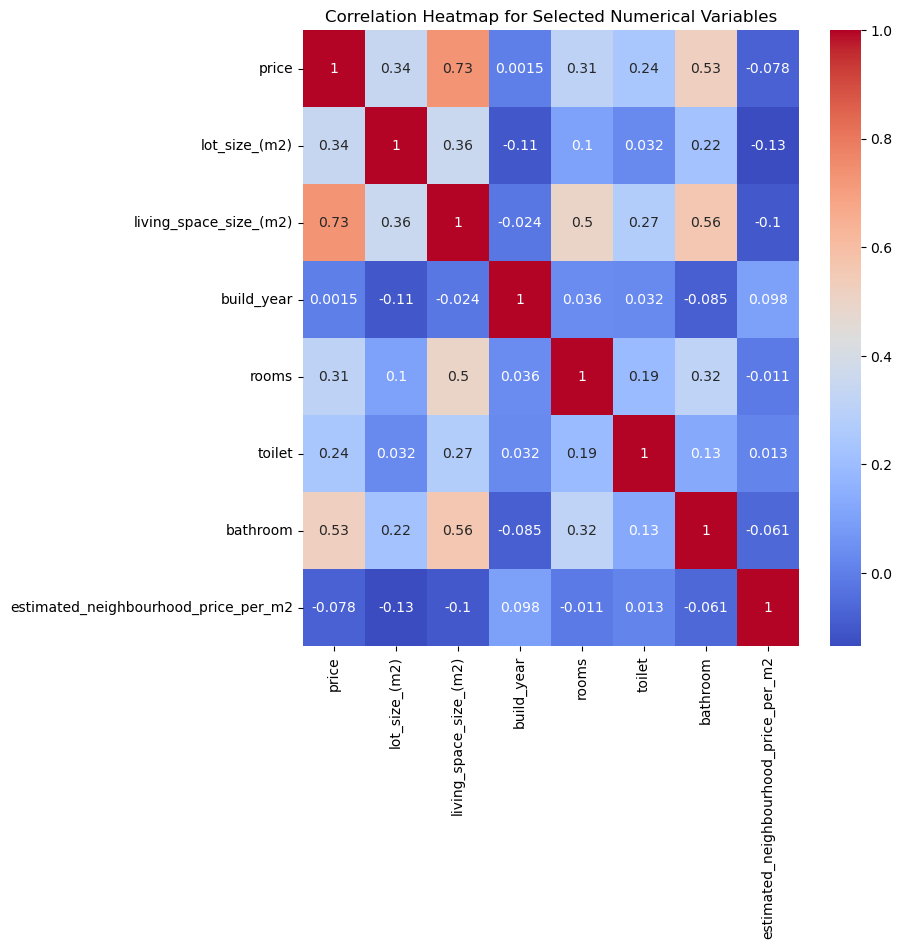

In [844]:
df_numerical = df.select_dtypes('number')

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# Check outliers

In [845]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [846]:
data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
print(outliers)

4       1050000
65      1250000
103     1175000
144     1150000
183     1295000
194     1050000
196     1150000
212     1100000
227     2925000
266     4700000
274     1250000
337     1299069
365     1295000
444     1095000
464     1395000
476     4350000
558     1695000
626     1075000
639     2695000
718     1099000
791     1135000
817     1395000
849     1250000
923     1950000
1008    3475000
1009    1050000
1011    1650000
1073    1190000
1093    1395000
1161    1100000
1173    1250000
1177    1795000
1190    1285000
1249    1745000
1253    1285000
1310    1745000
1333    1795000
1341    1050000
1357    1750000
1387    2695000
1397    1495000
1439    2175000
1445    1435000
1452    1195000
1476    1049000
1484    1395000
1622    1890000
1649    1045000
1686    1250000
1691    1250000
1699    1190000
1704    1150000
1716    1795000
1781    1200000
1782    1050000
1799    1075000
1812    1175000
1870    1050000
1896    1250000
1908    1175000
1931    1250000
1934    1550000
2029    

In [847]:
# Remove outliers from df['price']
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[(df['price'] >= Q1 - 1.5 * IQR) & 
                (df['price'] <= Q3 + 1.5 * IQR)]

df_cleaned = df_cleaned.reset_index()
df_cleaned.head(3)

,index,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
0,1,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
1,2,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855
2,3,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190


In [848]:
# Remove outliers from df['lot_size_(m2)']
Q1 = df_cleaned['lot_size_(m2)'].quantile(0.25)
Q3 = df_cleaned['lot_size_(m2)'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['lot_size_(m2)'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['lot_size_(m2)'] <= Q3 + 1.5 * IQR)]

df_cleaned = df_cleaned.reset_index()
df_cleaned.head(3)

,level_0,index,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
0,0,1,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
1,1,2,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855
2,2,3,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190


In [849]:
df_cleaned = df_cleaned.drop(columns=['level_0', 'index'])
df_cleaned.head(3)

,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
0,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
1,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855
2,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190


### Check outliers in another numerical columns with box plots

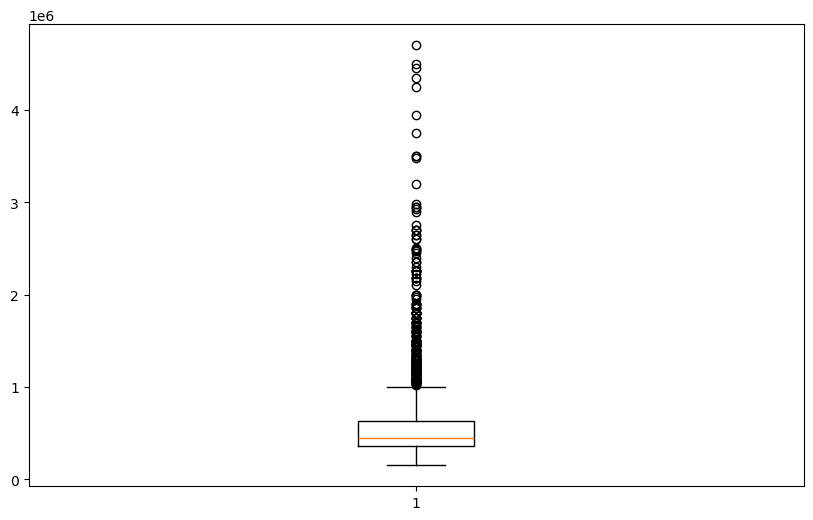

In [850]:
# Create a box plot
plt.figure(figsize=(10, 6))
# plt.boxplot(df_numerical)
plt.boxplot(df['price'])
plt.show()

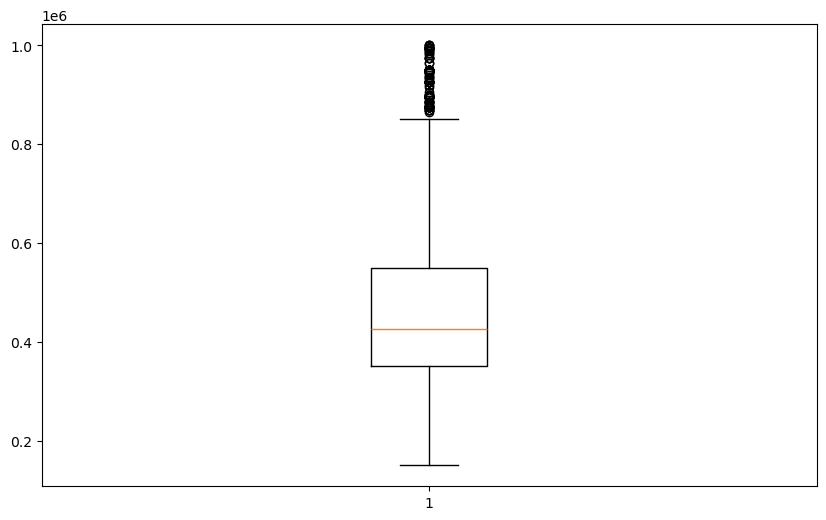

In [851]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['price'])
plt.show()

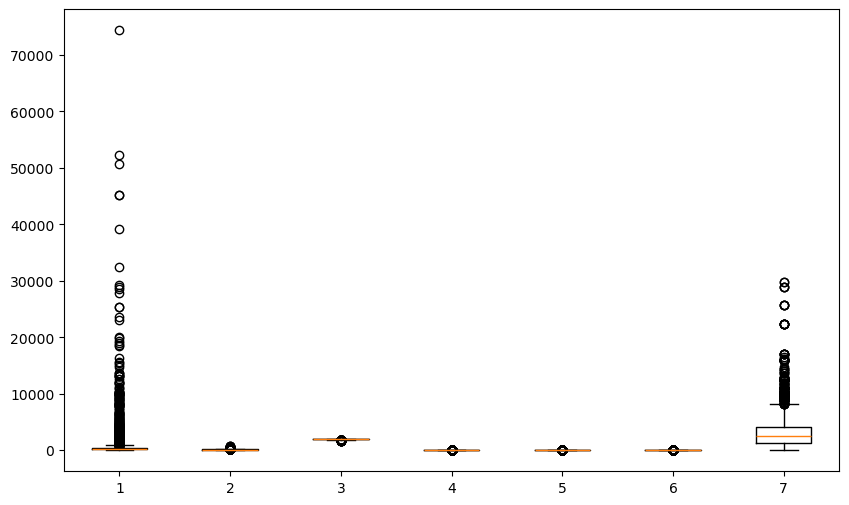

In [852]:
df_numerical_plot = df_numerical.drop(columns='price')
df_numerical_plot
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_plot)
plt.show()

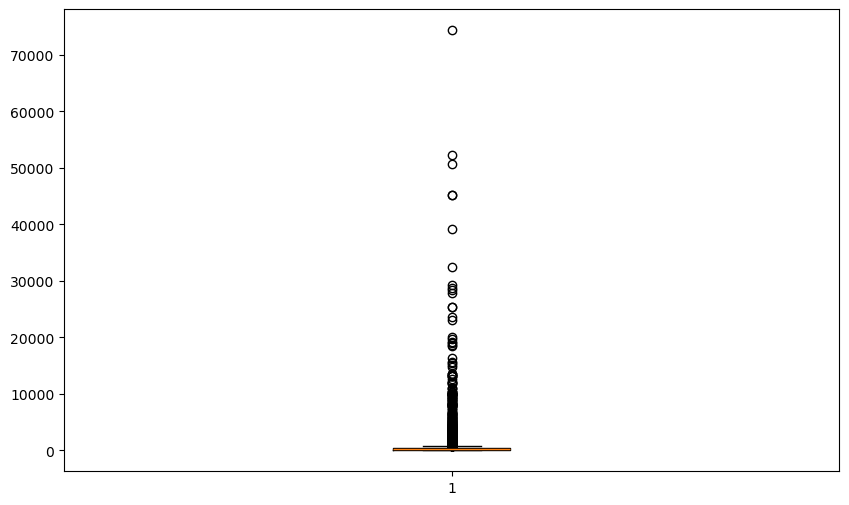

In [853]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['lot_size_(m2)'])
plt.show()

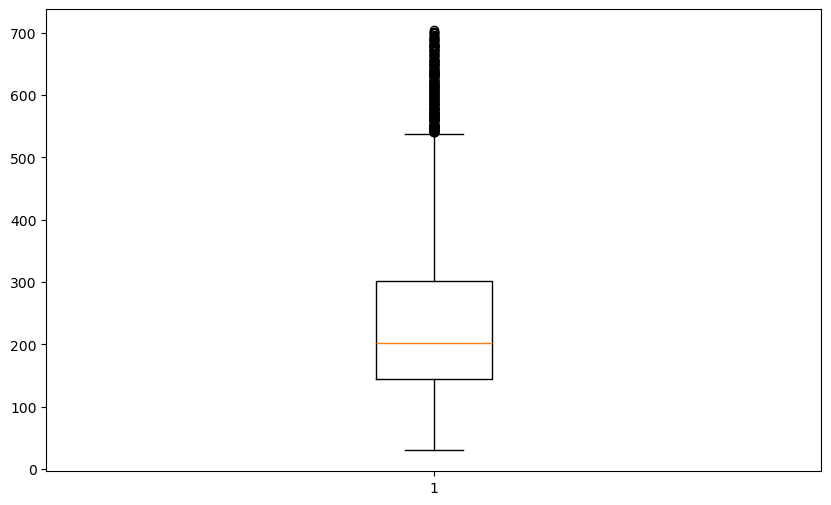

In [854]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['lot_size_(m2)'])
plt.show()

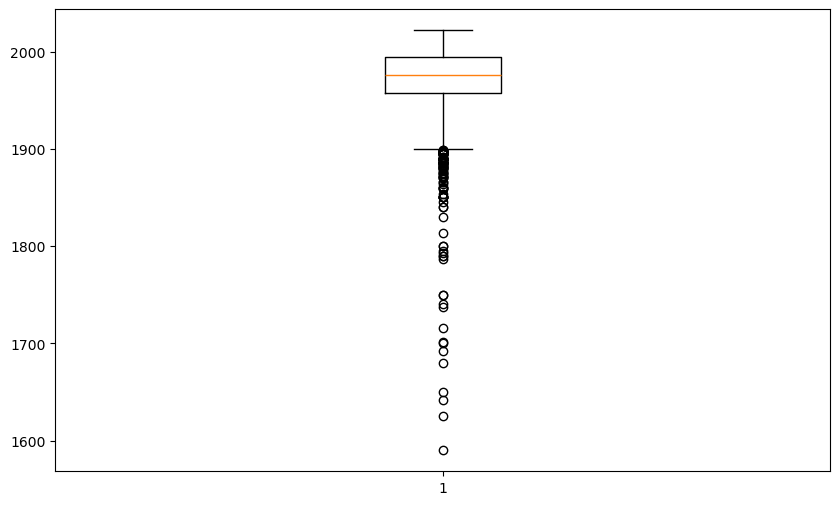

In [855]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['build_year'])
plt.show()

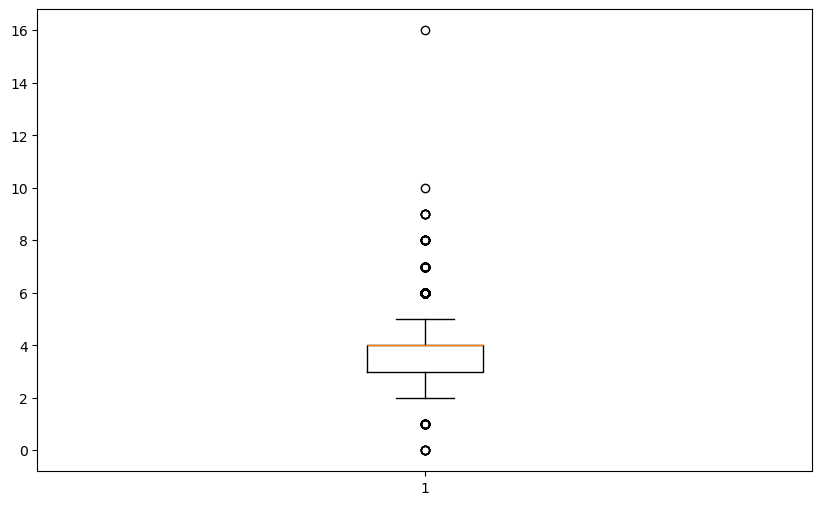

In [856]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['rooms'])
plt.show()

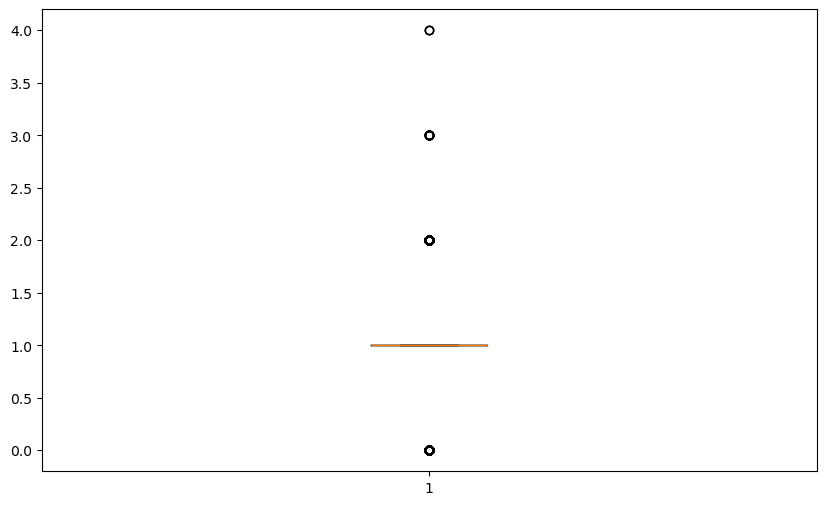

In [857]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['toilet'])
plt.show()

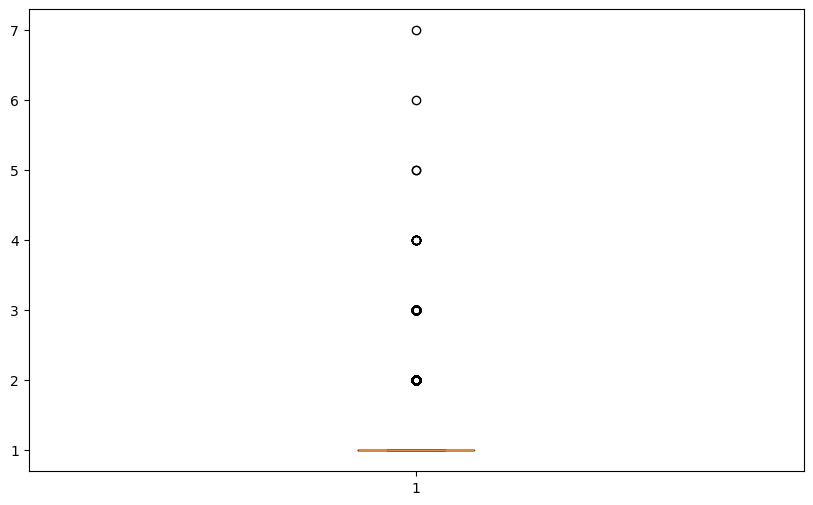

In [858]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['bathroom'])
plt.show()

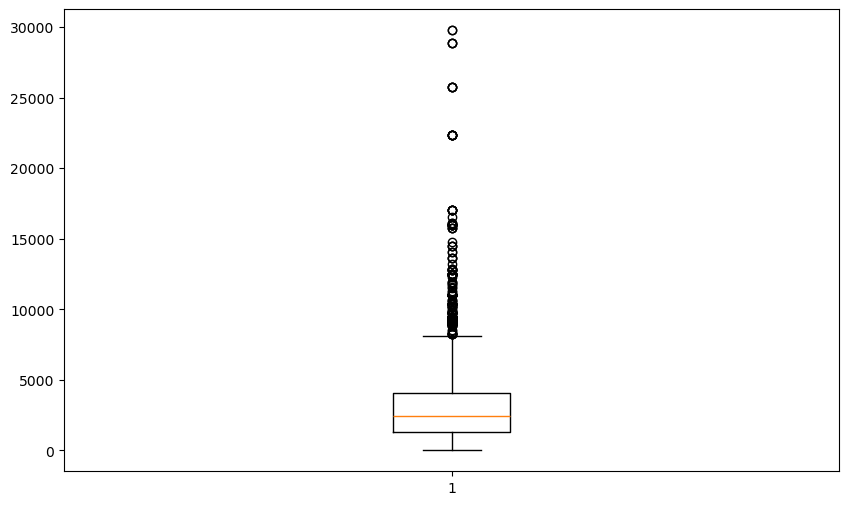

In [859]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['estimated_neighbourhood_price_per_m2'])
plt.show()

In [860]:
def remove_outliers(df, columns, z_threshold=3):

  # Ensure columns are numeric
  df_numeric = df[columns].apply(pd.to_numeric, errors='coerce')

  # Calculate Z-scores for the specified columns
  z_scores = np.abs(stats.zscore(df_numeric))

  # Filter rows where Z-scores are below the threshold
  df_no_outliers = df[(z_scores < z_threshold).all(axis=1)]
  
  return df_no_outliers

In [861]:
# Convert Int64 columns to float64
int64_columns = df_numerical.select_dtypes(include='int64').columns

df_numerical[int64_columns] = df_numerical[int64_columns].astype('float64')


In [862]:
df_numerical = df_cleaned[['price', 'lot_size_(m2)', 'living_space_size_(m2)','build_year', 'rooms', 'toilet', 'bathroom', 'estimated_neighbourhood_price_per_m2']]


In [863]:
numeric_features = ['living_space_size_(m2)','build_year', 'rooms', 'toilet', 'bathroom', 'estimated_neighbourhood_price_per_m2']
df_numerical_cleaned = remove_outliers(df_numerical,numeric_features)

In [864]:
df_numerical_cleaned.shape

(3926, 8)

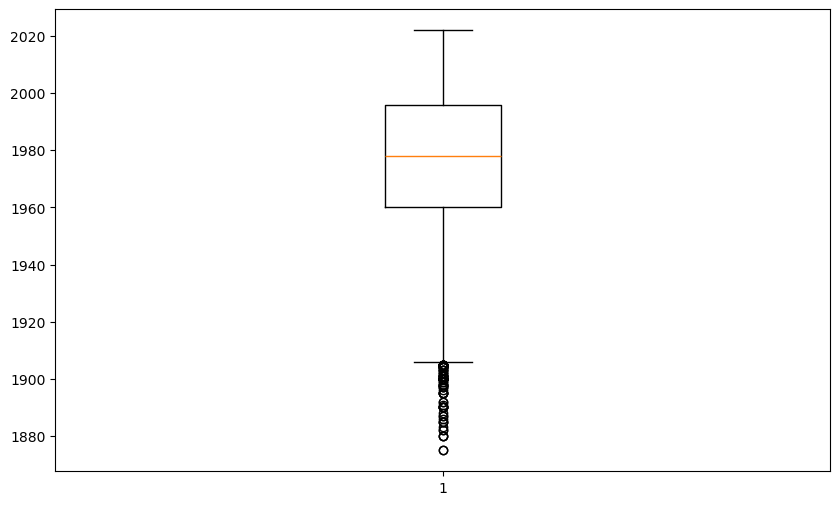

In [865]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['build_year'])
plt.show()

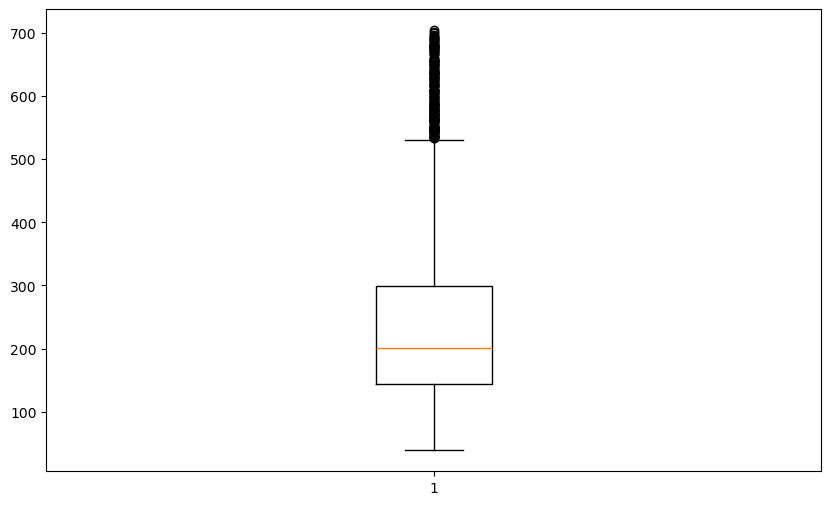

In [866]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['lot_size_(m2)'])
plt.show()

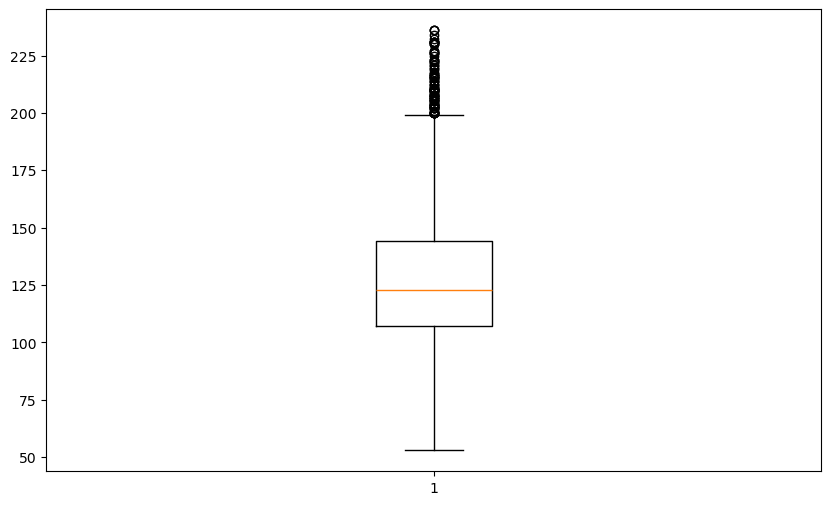

In [867]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['living_space_size_(m2)'])
plt.show()

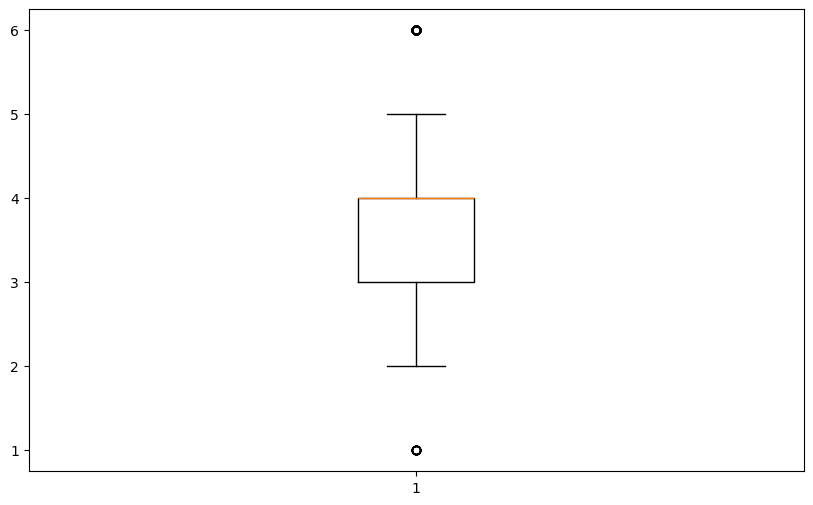

In [868]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['rooms'])
plt.show()

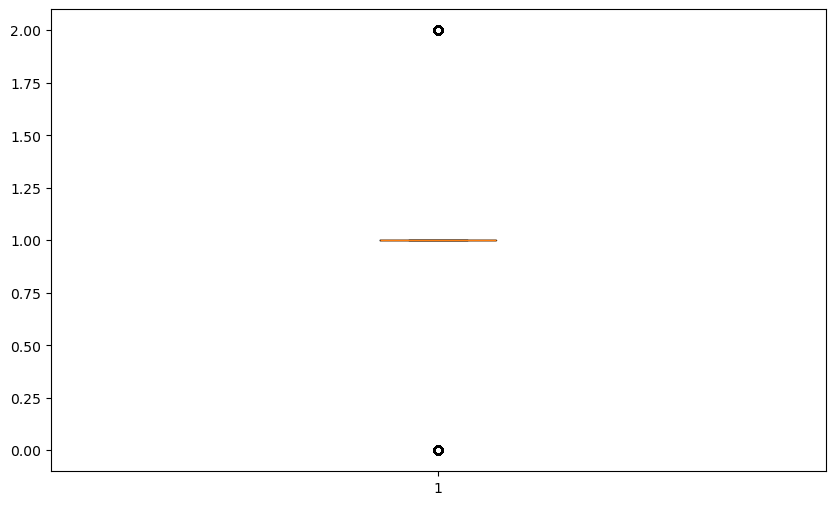

In [869]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['toilet'])
plt.show()

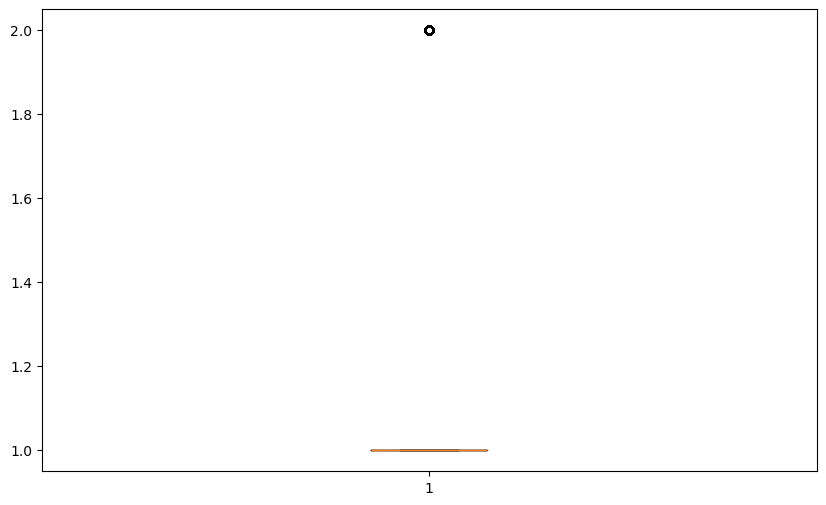

In [870]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['bathroom'])
plt.show()

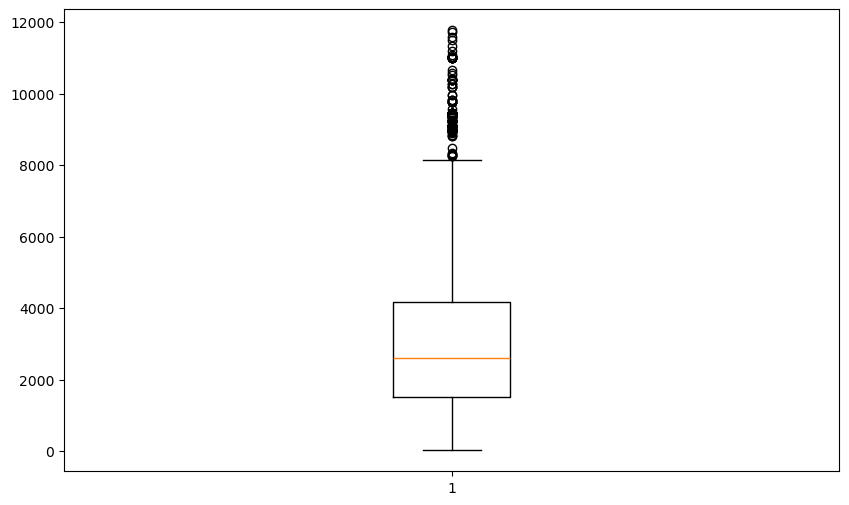

In [871]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical_cleaned['estimated_neighbourhood_price_per_m2'])
plt.show()

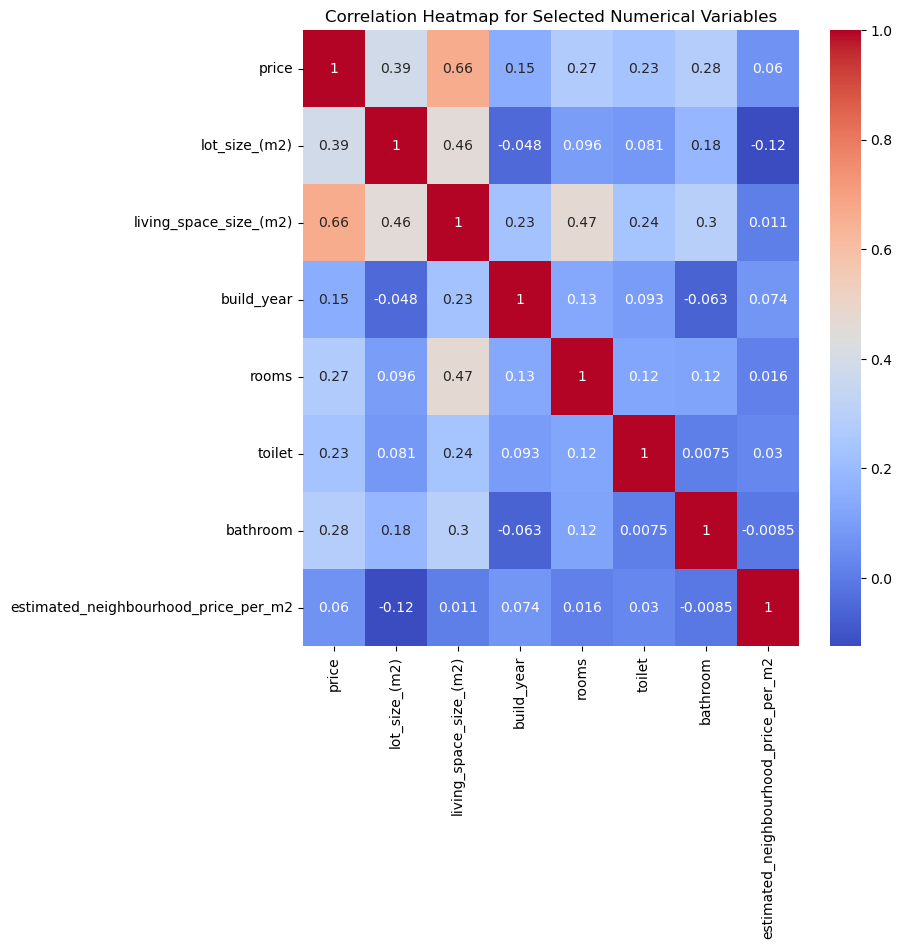

In [872]:
correlation_matrix = df_numerical_cleaned.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

### Correlation between categorical and numerical columns

Discretize the Continuous Variable

In [873]:
min = df_cleaned['price'].min()
max = df_cleaned['price'].max()

min, max

(150000, 1000000)

Create bins

In [874]:
# Define bin edges for 3 bins
bins = [150000, 350000, 600000, 1000000]
labels = ['150k-350k', '350k-600k', '600k-1M']

# Bin the 'price' column into categories
df_cleaned['price_category'] = pd.cut(df_cleaned['price'], bins=bins, labels=labels)
df_cleaned.head()

,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2,price_category
0,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435,350k-600k
1,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855,350k-600k
2,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190,150k-350k
3,Oudewater,445000,127,126,2016,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,4,1,1,3 woonlagen,A,In woonwijk,Achtertuin en voortuin,1745,350k-600k
4,Utrecht,425000,170,87,1984,Bestaande bouw,Eengezinswoning,hoekwoning,Zadeldak bedekt met pannen,3,1,1,2 woonlagen en een vliering,C,In woonwijk,Achtertuin en voortuin,7080,350k-600k


In [875]:
def categorical_correlation(df, column_name1, column_name2):
    crosstab_result = pd.crosstab(df[column_name1], df[column_name2])
    chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
    chi2_statistic, chi2_p_value

    cramer = association(crosstab_result, method="cramer")

    print('chi_p_value :', chi2_p_value)
    print('cramer value :', cramer )

In [876]:
df_categorical = df_cleaned.select_dtypes(['object', 'category'])
df_categorical.head()

,city,build_type,house_type,house_type_detail,roof,floors,energy_label,position,garden,price_category
0,Waddinxveen,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,350k-600k
1,Houten,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,350k-600k
2,Pannerden,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",150k-350k
3,Oudewater,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,3 woonlagen,A,In woonwijk,Achtertuin en voortuin,350k-600k
4,Utrecht,Bestaande bouw,Eengezinswoning,hoekwoning,Zadeldak bedekt met pannen,2 woonlagen en een vliering,C,In woonwijk,Achtertuin en voortuin,350k-600k


In [877]:
def summary_categorical_correlation(df, target_column):

    categorical_columns = df.select_dtypes(['object', 'category']).columns
    categorical_columns = [col for col in categorical_columns if col != target_column]

    results = []

    for column in categorical_columns:
        crosstab_result = pd.crosstab(df[column], df[target_column])

        # Chi-square test
        chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

        # Cramer's V
        cramer = association(crosstab_result, method="cramer")

        # Append all results
        results.append({
            'Column': column,
            'Chi2 p-value': chi2_p_value,
            'Cramer V': cramer
        })
    
    # Create a DataFrame for results
    results_df = pd.DataFrame(results)

    return results_df


In [878]:
summary = summary_categorical_correlation(df_cleaned, 'price_category')
summary.sort_values(by='Cramer V', ascending=False)

,Column,Chi2 p-value,Cramer V
0,city,3.399338e-50,0.567079
7,position,1.247486e-10,0.304792
2,house_type,8.464020e-145,0.296345
3,house_type_detail,4.130406e-69,0.265309
8,garden,4.736084e-48,0.229080
6,energy_label,1.905457e-50,0.187084
4,roof,6.523155e-12,0.184359
5,floors,6.842208e-31,0.179369
1,build_type,2.617319e-01,0.025555


The strong correlation with price comes from city, position, and house_type.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_23360\2890677602.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='house_type', y='price', palette="coolwarm")


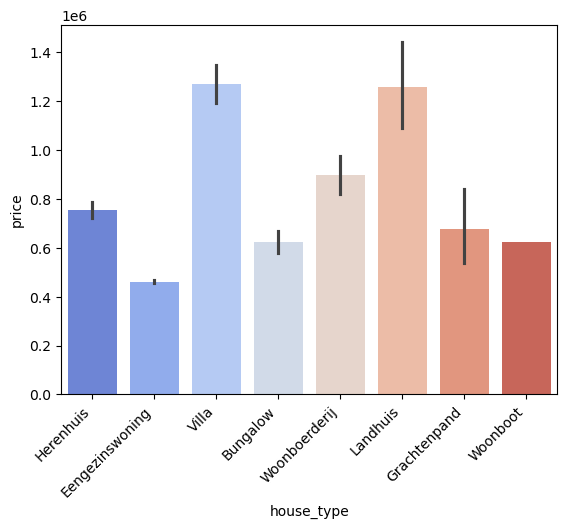

In [879]:
sns.barplot(data=df, x='house_type', y='price', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_23360\2941494524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df_house_type_detail, x='house_type_detail', y='price', palette="coolwarm")


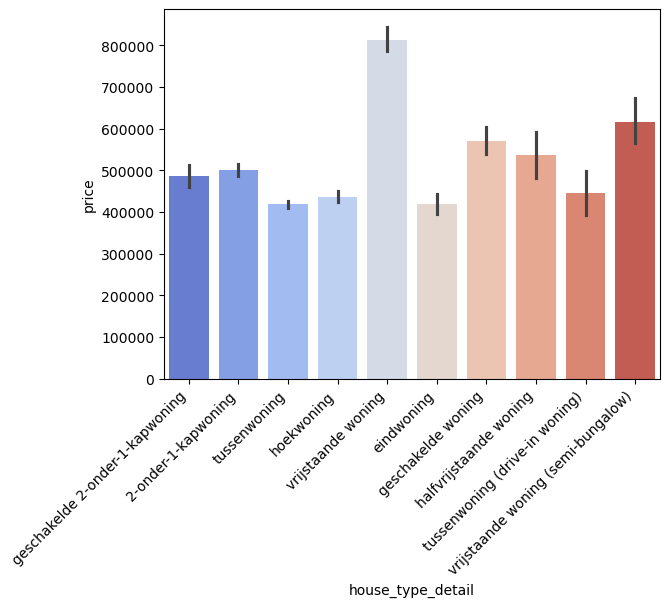

In [880]:
top_10_house_type_detail = df['house_type_detail'].value_counts().head(10).index
filtered_df_house_type_detail = df[df['house_type_detail'].isin(top_10_house_type_detail)]

sns.barplot(data=filtered_df_house_type_detail, x='house_type_detail', y='price', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_23360\1364562537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df_garden, x='garden', y='price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Achtertuin en voortuin'),
  Text(1, 0, 'Achtertuin'),
  Text(2, 0, 'Achtertuin, voortuin en zijtuin'),
  Text(3, 0, 'Voortuin en zijtuin'),
  Text(4, 0, 'Tuin rondom'),
  Text(5, 0, 'Achtertuin en zijtuin'),
  Text(6, 0, 'Achtertuin, voortuin, zijtuin en zonneterras'),
  Text(7, 0, 'Achtertuin, voortuin en zonneterras'),
  Text(8, 0, 'Tuin rondom en zonneterras'),
  Text(9, 0, 'Achtertuin, tuin rondom, voortuin en zijtuin')])

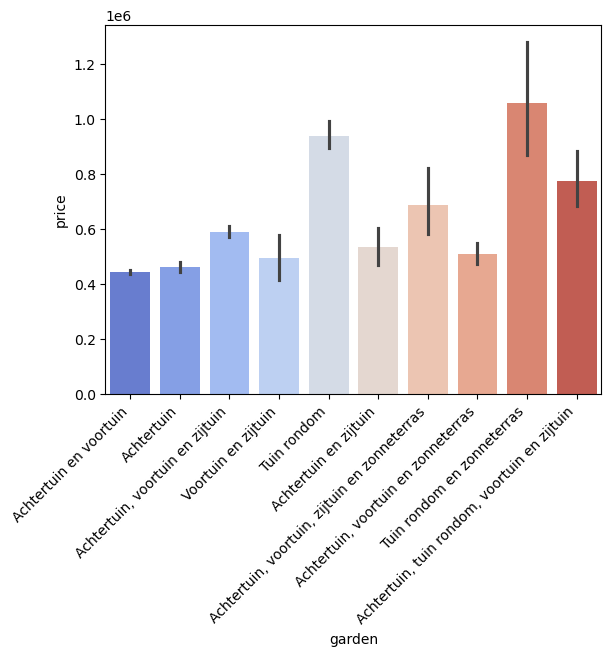

In [881]:
top_10_garden = df['garden'].value_counts().head(10).index
filtered_df_garden = df[df['garden'].isin(top_10_garden)]

sns.barplot(data=filtered_df_garden, x='garden', y='price', palette="coolwarm")
plt.xticks(rotation=45, ha='right')

## Numerical Features 

#### Train Test Split

In [882]:
features = df_numerical_cleaned.drop(columns='price')
target = df_numerical_cleaned["price"]

In [883]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

#### Normalization

In [884]:
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Try also with scaler

In [885]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Regression**

Fit it to our training data and Transforming our training and testing data

In [886]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

#### KNN Regressor - modeling

In [887]:
knn = KNeighborsRegressor(n_neighbors=20)

Training KNN to our normalized data

In [888]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=20)

#### Evaluate model's performance

In [889]:
knn.score(X_test_norm, y_test)

0.5061740815409106

In [890]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [891]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=20)

In [892]:
knn.score(X_test_scaled, y_test)

0.5109513127534682

By the correlation matrix we can see that:
- "build_year" and "estimated_neighbourhood_price_per_m2" have pretty low correlation with our target variable, so lets remove them from our selected features

In [893]:
# X_train_reduced = X_train_norm.drop(columns = ["build_year","estimated_neighbourhood_price_per_m2"])
# X_test_reduced = X_test_norm.drop(columns = ["build_year","estimated_neighbourhood_price_per_m2"])

In [894]:
# knn = KNeighborsRegressor(n_neighbors=20)
# knn.fit(X_train_reduced, y_train)

# knn.score(X_test_reduced, y_test) # 0.346478428883515

Feature Impact: <br> 
Removing features that are less correlated with the target doesn't always guarantee better performance. Sometimes, features that seem less important might still hold some information that is useful in conjunction with other features. In this case, the R2 score becomes 0.346. Therefore, let's keep the build_year and estimated_neighbourhood_price_per_m2 column.

In [895]:
# Predictions
y_pred = knn.predict(X_test_norm)

In [896]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 23654806865.8397
Root Mean Squared Error: 153801.1927
Mean Absolute Error: 125674.0331
R-squared Score: 0.0557


In [897]:
# Predictions
y_pred = knn.predict(X_test_scaled)

In [898]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 12251025094.0053
Root Mean Squared Error: 110684.3489
Mean Absolute Error: 84137.1821
R-squared Score: 0.5110


In [899]:
# accuracy = accuracy_score(y_test, y_pred)


### **Linear Regression**

In [900]:
# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)

# Make predictions
pred = lin_reg.predict(X_test_norm)

#### Evaluate model's performance

In [901]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 86261.8809708739
RMSE 113112.65811119149
R2 score 0.4892573980965459


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Check feature's importance

In [902]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, lin_reg.coef_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 534436.2446
lot_size_(m2): 87397.2459
toilet: 65226.6275
estimated_neighbourhood_price_per_m2: 58094.1551
bathroom: 49782.6539
build_year: 15493.3353
rooms: -35860.1349


### **Random Forest**

In [903]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

#### Evaluate model's performance

In [904]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 11627503203.7445
Root Mean Squared Error: 107830.9010
Mean Absolute Error: 82172.6350
R-squared Score: 0.5358


#### Check Feature importance

In [905]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, rf_regressor.feature_importances_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 0.5241
build_year: 0.1530
lot_size_(m2): 0.1353
estimated_neighbourhood_price_per_m2: 0.1157
rooms: 0.0322
toilet: 0.0229
bathroom: 0.0169


### **Ada Boost**

In [906]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [907]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

#### Evaluate model's performance

In [908]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 82737.58687939963
RMSE 110085.2566417669
R2 score 0.5162310543261754


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **Gradient Boosting**

In [909]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [910]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

#### Evaluate model's performance

In [911]:
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 109961.26972020582
RMSE 148641.02798929752
R2 score 0.11802338871160067


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **SVM**

In [912]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM regressor
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [913]:
# Make predictions
y_pred = svr.predict(X_test_scaled)

#### Evaluate model's performance

In [914]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 25926728414.8701
Root Mean Squared Error: 161017.7891
Mean Absolute Error: 124591.1314
R-squared Score: -0.0350


## **Summary on Evaluation of Model's Performance**

In [915]:
def get_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [916]:
# Collect performance metrics
performance = {}

# KNN
y_pred_knn = knn.predict(X_test_norm)
performance['KNN'] = get_model_performance(y_test, y_pred_knn)

# Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test_norm)
performance['Linear Regression'] = get_model_performance(y_test, y_pred_lin_reg)

# Random Forest
y_pred_rf = rf_regressor.predict(X_test)
performance['Random Forest'] = get_model_performance(y_test, y_pred_rf)

# AdaBoost
y_pred_ada = ada_reg.predict(X_test_norm)
performance['AdaBoost'] = get_model_performance(y_test, y_pred_ada)

# Gradient Boosting
y_pred_gb = gb_reg.predict(X_test_norm)
performance['Gradient Boosting'] = get_model_performance(y_test, y_pred_gb)

In [917]:
# Create DataFrame
performance_df = pd.DataFrame(performance, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']).T

# Print DataFrame
print(performance_df)

                   Mean Squared Error  Root Mean Squared Error  \
KNN                      2.365481e+10            153801.192667   
Linear Regression        1.279447e+10            113112.658111   
Random Forest            1.162750e+10            107830.900969   
AdaBoost                 1.211876e+10            110085.256642   
Gradient Boosting        2.209416e+10            148641.027989   

                   Mean Absolute Error  R-squared Score  
KNN                      125674.033079         0.055724  
Linear Regression         86261.880971         0.489257  
Random Forest             82172.635038         0.535842  
AdaBoost                  82737.586879         0.516231  
Gradient Boosting        109961.269720         0.118023  


In [918]:
#display all rows
pd.set_option('display.max_rows', None)
performance_df.sort_values(by = "R-squared Score", ascending = False)

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared Score
Random Forest,1.162750e+10,107830.900969,82172.635038,0.535842
AdaBoost,1.211876e+10,110085.256642,82737.586879,0.516231
Linear Regression,1.279447e+10,113112.658111,86261.880971,0.489257
Gradient Boosting,2.209416e+10,148641.027989,109961.269720,0.118023
KNN,2.365481e+10,153801.192667,125674.033079,0.055724


In [919]:
df_cleaned.dtypes

city                                      object
price                                      int64
lot_size_(m2)                              int64
living_space_size_(m2)                     int64
build_year                                 int64
build_type                                object
house_type                                object
house_type_detail                         object
roof                                      object
rooms                                      int64
toilet                                     int64
bathroom                                   int64
floors                                    object
energy_label                              object
position                                  object
garden                                    object
estimated_neighbourhood_price_per_m2       int64
price_category                          category
dtype: object

# Cleaning outliers on numerical columns with z score

In [920]:
df_numerical = df_cleaned[['price', 'lot_size_(m2)', 'living_space_size_(m2)','build_year', 'rooms', 'toilet', 'bathroom', 'estimated_neighbourhood_price_per_m2']]


In [921]:
numeric_features = ['price', 'lot_size_(m2)','living_space_size_(m2)','build_year', 'rooms', 'toilet', 'bathroom', 'estimated_neighbourhood_price_per_m2']
df_numerical_cleaned = remove_outliers(df_numerical,numeric_features)

In [922]:
df_numerical_cleaned.shape

(3862, 8)

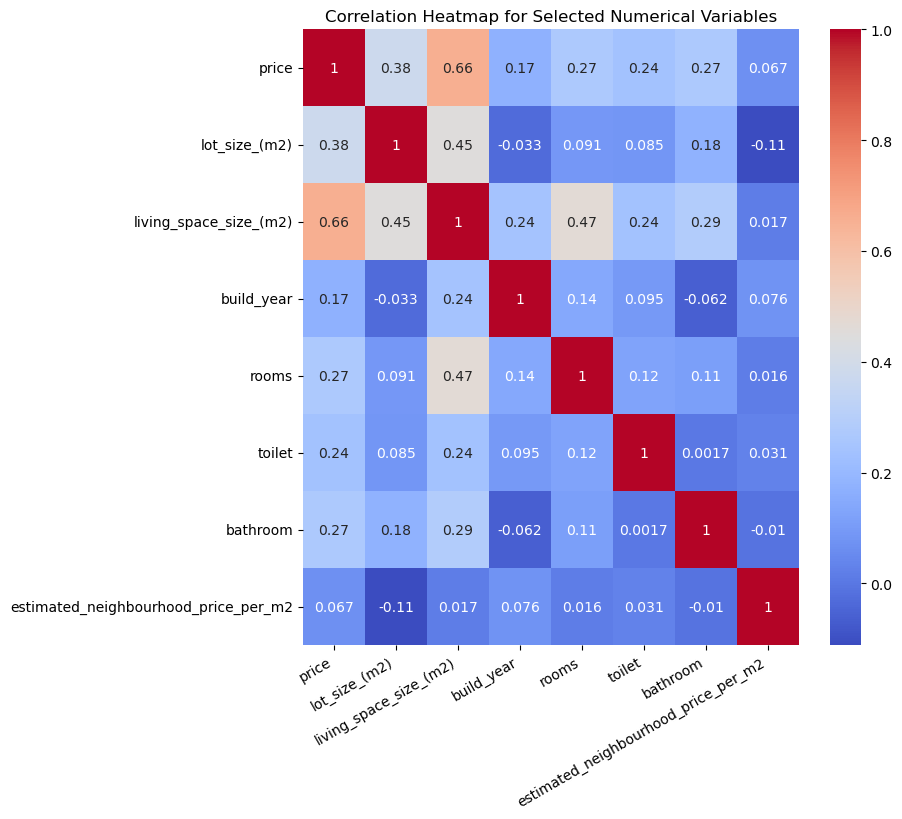

In [926]:
correlation_matrix = df_numerical_cleaned.corr()

# Set up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 8))

# Draw the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", 
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Rotate the x-axis labels by 60 degrees
plt.xticks(rotation=30, ha='right')

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

#### Train Test Split

In [715]:
features = df_numerical_cleaned.drop(columns='price')
target = df_numerical_cleaned["price"]

In [716]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

#### Normalization

In [717]:
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

### **Regression**

Fit it to our training data and Transforming our training and testing data

In [718]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

#### KNN Regressor - modeling

In [719]:
knn = KNeighborsRegressor(n_neighbors=20)

In [720]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=20)

#### Evaluate model's performance

In [721]:
knn.score(X_test_norm, y_test)

0.4777384163833184

In [722]:
# Predictions
y_pred = knn.predict(X_test_norm)

In [723]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 11572321354.3106
Root Mean Squared Error: 107574.7245
Mean Absolute Error: 80999.6305
R-squared Score: 0.4777


### **Linear Regression**

In [724]:
# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)

# Make predictions
pred = lin_reg.predict(X_test_norm)

In [725]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 84276.62407732136
RMSE 110427.06339893393
R2 score 0.4496757602874826


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [726]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, lin_reg.coef_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 543242.6155
lot_size_(m2): 73281.9479
toilet: 61471.7288
estimated_neighbourhood_price_per_m2: 50317.9230
bathroom: 47179.5215
build_year: 34749.8726
rooms: -36419.7415


### **Random Forest**

In [727]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

In [728]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 10878661125.4697
Root Mean Squared Error: 104300.8203
Mean Absolute Error: 80537.8598
R-squared Score: 0.5090


In [729]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, rf_regressor.feature_importances_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 0.5337
build_year: 0.1473
lot_size_(m2): 0.1325
estimated_neighbourhood_price_per_m2: 0.1177
rooms: 0.0329
toilet: 0.0212
bathroom: 0.0146


### **Ada Boost**

In [730]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [731]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [732]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 80370.78702868814
RMSE 106560.15461267163
R2 score 0.4875431767344566


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **Gradient Boosting**

In [733]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [734]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [735]:
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 109386.07618434893
RMSE 149241.7192747726
R2 score -0.005189823417483641


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **XGBoost**

In [736]:
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)


In [737]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [738]:
y_pred = xgb_regressor.predict(X_test)

In [739]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 11828610669.0887
Root Mean Squared Error: 108759.4165
Mean Absolute Error: 82249.5649
R-squared Score: 0.4662


In [740]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, xgb_regressor.feature_importances_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 0.4117
bathroom: 0.1410
toilet: 0.1164
build_year: 0.1047
estimated_neighbourhood_price_per_m2: 0.0807
lot_size_(m2): 0.0748
rooms: 0.0708


In [741]:
def get_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [742]:
# Collect performance metrics
performance = {}

# KNN
y_pred_knn = knn.predict(X_test_norm)
performance['KNN'] = get_model_performance(y_test, y_pred_knn)

# Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test_norm)
performance['Linear Regression'] = get_model_performance(y_test, y_pred_lin_reg)

# Random Forest
y_pred_rf = rf_regressor.predict(X_test)
performance['Random Forest'] = get_model_performance(y_test, y_pred_rf)

# AdaBoost
y_pred_ada = ada_reg.predict(X_test_norm)
performance['AdaBoost'] = get_model_performance(y_test, y_pred_ada)

# Gradient Boosting
y_pred_gb = gb_reg.predict(X_test_norm)
performance['Gradient Boosting'] = get_model_performance(y_test, y_pred_gb)

# XGBoost
y_pred_xgb = xgb_regressor.predict(X_test_norm)
performance['XGBoost'] = get_model_performance(y_test, y_pred_xgb)

In [743]:
# Create DataFrame
performance_df_z = pd.DataFrame(performance, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']).T

# Print DataFrame
print(performance_df_z)

                   Mean Squared Error  Root Mean Squared Error  \
KNN                      1.157232e+10            107574.724514   
Linear Regression        1.219414e+10            110427.063399   
Random Forest            1.087866e+10            104300.820349   
AdaBoost                 1.135507e+10            106560.154613   
Gradient Boosting        2.227309e+10            149241.719275   
XGBoost                  3.620357e+10            190272.354874   

                   Mean Absolute Error  R-squared Score  
KNN                       80999.630530         0.477738  
Linear Regression         84276.624077         0.449676  
Random Forest             80537.859832         0.509043  
AdaBoost                  80370.787029         0.487543  
Gradient Boosting        109386.076184        -0.005190  
XGBoost                  140623.744745        -0.633876  


In [744]:
#display all rows
pd.set_option('display.max_rows', None)
performance_df_z = performance_df_z.sort_values(by = "R-squared Score", ascending = False)

In [745]:
performance_df_z

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared Score
Random Forest,1.087866e+10,104300.820349,80537.859832,0.509043
AdaBoost,1.135507e+10,106560.154613,80370.787029,0.487543
KNN,1.157232e+10,107574.724514,80999.630530,0.477738
Linear Regression,1.219414e+10,110427.063399,84276.624077,0.449676
Gradient Boosting,2.227309e+10,149241.719275,109386.076184,-0.005190
XGBoost,3.620357e+10,190272.354874,140623.744745,-0.633876


# Cleaning outliers on numerical columns with IQR

In [746]:
# Remove outliers 
Q1 = df_cleaned['living_space_size_(m2)'].quantile(0.25)
Q3 = df_cleaned['living_space_size_(m2)'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['living_space_size_(m2)'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['living_space_size_(m2)'] <= Q3 + 1.5 * IQR)]

In [747]:
# Remove outliers 
Q1 = df_cleaned['build_year'].quantile(0.25)
Q3 = df_cleaned['build_year'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['build_year'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['build_year'] <= Q3 + 1.5 * IQR)]

In [748]:
# Remove outliers 
Q1 = df_cleaned['rooms'].quantile(0.25)
Q3 = df_cleaned['rooms'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['rooms'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['rooms'] <= Q3 + 1.5 * IQR)]

In [749]:
# Remove outliers 
Q1 = df_cleaned['toilet'].quantile(0.25)
Q3 = df_cleaned['toilet'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['toilet'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['toilet'] <= Q3 + 1.5 * IQR)]

In [750]:
# Remove outliers 
Q1 = df_cleaned['bathroom'].quantile(0.25)
Q3 = df_cleaned['bathroom'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['bathroom'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['bathroom'] <= Q3 + 1.5 * IQR)]

In [751]:
# Remove outliers 
Q1 = df_cleaned['estimated_neighbourhood_price_per_m2'].quantile(0.25)
Q3 = df_cleaned['estimated_neighbourhood_price_per_m2'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[(df_cleaned['estimated_neighbourhood_price_per_m2'] >= Q1 - 1.5 * IQR) & 
                (df_cleaned['estimated_neighbourhood_price_per_m2'] <= Q3 + 1.5 * IQR)]

In [752]:
df_cleaned.shape

(2663, 18)

In [753]:
df_numerical = df_cleaned[['price', 'lot_size_(m2)', 'living_space_size_(m2)','build_year', 'rooms', 'toilet', 'bathroom', 'estimated_neighbourhood_price_per_m2']]

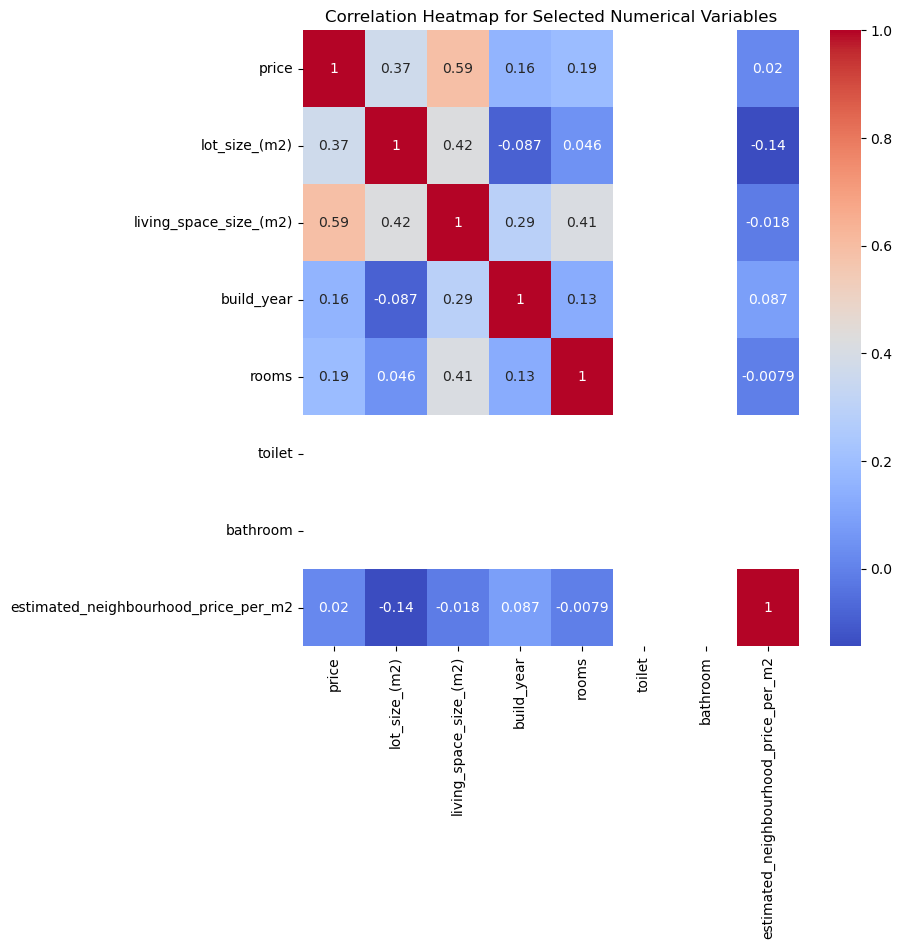

In [754]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# New analysis

#### Train Test Split

In [755]:
features = df_numerical.drop(columns='price')
target = df_numerical["price"]

In [756]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

#### Normalization

In [757]:
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

### **Regression**

Fit it to our training data and Transforming our training and testing data

In [758]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

#### KNN Regressor - modeling

In [759]:
knn = KNeighborsRegressor(n_neighbors=20)

In [760]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=20)

#### Evaluate model's performance

In [761]:
knn.score(X_test_norm, y_test)

0.30730615355181423

In [762]:
# Predictions
y_pred = knn.predict(X_test_norm)

In [763]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 12843172114.0686
Root Mean Squared Error: 113327.7200
Mean Absolute Error: 82840.1171
R-squared Score: 0.3073


### **Linear Regression**

In [764]:
# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)

# Make predictions
pred = lin_reg.predict(X_test_norm)

In [765]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 82226.88552102477
RMSE 110000.61716717685
R2 score 0.34738166555872074


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [766]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, lin_reg.coef_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 420123.4438
lot_size_(m2): 121637.6140
estimated_neighbourhood_price_per_m2: 29303.6488
build_year: 14936.0134
toilet: 0.0000
bathroom: 0.0000
rooms: -17743.6405


### **Random Forest**

In [767]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

In [768]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 11905795492.8712
Root Mean Squared Error: 109113.6815
Mean Absolute Error: 81241.6881
R-squared Score: 0.3579


In [769]:
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, rf_regressor.feature_importances_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 0.4669
build_year: 0.1815
lot_size_(m2): 0.1725
estimated_neighbourhood_price_per_m2: 0.1434
rooms: 0.0357
toilet: 0.0000
bathroom: 0.0000


### **Ada Boost**

In [770]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [771]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [772]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 79896.78829073923
RMSE 110759.55398537907
R2 score 0.3383452671330789


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **Gradient Boosting**

In [773]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [774]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [775]:
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 105085.92416499389
RMSE 142273.1192073853
R2 score -0.09172871440997943


c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **XGBoost**

In [776]:
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [777]:
y_pred = xgb_regressor.predict(X_test)

In [778]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 13283331916.6906
Root Mean Squared Error: 115253.3380
Mean Absolute Error: 86218.5269
R-squared Score: 0.2836


In [779]:
# Feature Importance
feature_importance = {feature: importance for feature, importance in zip(X_train.columns, xgb_regressor.feature_importances_)}
print("\nFeature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
living_space_size_(m2): 0.4514
build_year: 0.1877
rooms: 0.1280
estimated_neighbourhood_price_per_m2: 0.1200
lot_size_(m2): 0.1130
toilet: 0.0000
bathroom: 0.0000


In [780]:
def get_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

In [781]:
# Collect performance metrics
performance = {}

# KNN
y_pred_knn = knn.predict(X_test_norm)
performance['KNN'] = get_model_performance(y_test, y_pred_knn)

# Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test_norm)
performance['Linear Regression'] = get_model_performance(y_test, y_pred_lin_reg)

# Random Forest
y_pred_rf = rf_regressor.predict(X_test)
performance['Random Forest'] = get_model_performance(y_test, y_pred_rf)

# Ada Boost
y_pred_ada = ada_reg.predict(X_test_norm)
performance['AdaBoost'] = get_model_performance(y_test, y_pred_ada)

# Gradient Boosting
y_pred_gb = gb_reg.predict(X_test_norm)
performance['Gradient Boosting'] = get_model_performance(y_test, y_pred_gb)

# XGBoost
y_pred_xgb = xgb_regressor.predict(X_test_norm)
performance['XGBoost'] = get_model_performance(y_test, y_pred_xgb)

In [782]:
# Create DataFrame
performance_df_iqr = pd.DataFrame(performance, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']).T

# Print DataFrame
print(performance_df_iqr)

                   Mean Squared Error  Root Mean Squared Error  \
KNN                      1.284317e+10            113327.719972   
Linear Regression        1.210014e+10            110000.617167   
Random Forest            1.190580e+10            109113.681511   
AdaBoost                 1.226768e+10            110759.553985   
Gradient Boosting        2.024164e+10            142273.119207   
XGBoost                  3.149407e+10            177465.674882   

                   Mean Absolute Error  R-squared Score  
KNN                       82840.117073         0.307306  
Linear Regression         82226.885521         0.347382  
Random Forest             81241.688068         0.357863  
AdaBoost                  79896.788291         0.338345  
Gradient Boosting        105085.924165        -0.091729  
XGBoost                  131564.844454        -0.698626  


In [783]:
#display all rows
pd.set_option('display.max_rows', None)
performance_df_iqr = performance_df_iqr.sort_values(by = "R-squared Score", ascending = False)

In [784]:
performance_df_iqr

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared Score
Random Forest,1.190580e+10,109113.681511,81241.688068,0.357863
Linear Regression,1.210014e+10,110000.617167,82226.885521,0.347382
AdaBoost,1.226768e+10,110759.553985,79896.788291,0.338345
KNN,1.284317e+10,113327.719972,82840.117073,0.307306
Gradient Boosting,2.024164e+10,142273.119207,105085.924165,-0.091729
XGBoost,3.149407e+10,177465.674882,131564.844454,-0.698626


**Visualization**

R-squared values

In [573]:
# Reset the index to convert the model names from index to a column
performance_df_z = performance_df_z.reset_index().rename(columns={'index': 'Model'})
performance_df_iqr = performance_df_iqr.reset_index().rename(columns={'index': 'Model'})

# Select only the 'Model' and 'R-squared Score' columns
performance_df_z = performance_df_z[['Model', 'R-squared Score']].rename(columns={'R-squared Score': 'Z-score'})
performance_df_iqr = performance_df_iqr[['Model', 'R-squared Score']].rename(columns={'R-squared Score': 'IQR'})

# Merge the dataframes on the 'Model' column
performance_combined = pd.merge(performance_df_z, performance_df_iqr, on='Model')

In [574]:
# Melt the dataframe to have a long format suitable for sns.barplot
performance_melted = pd.melt(performance_combined, id_vars=['Model'], value_vars=['Z-score', 'IQR'],
                             var_name='Removal method', value_name='R-squared Score')

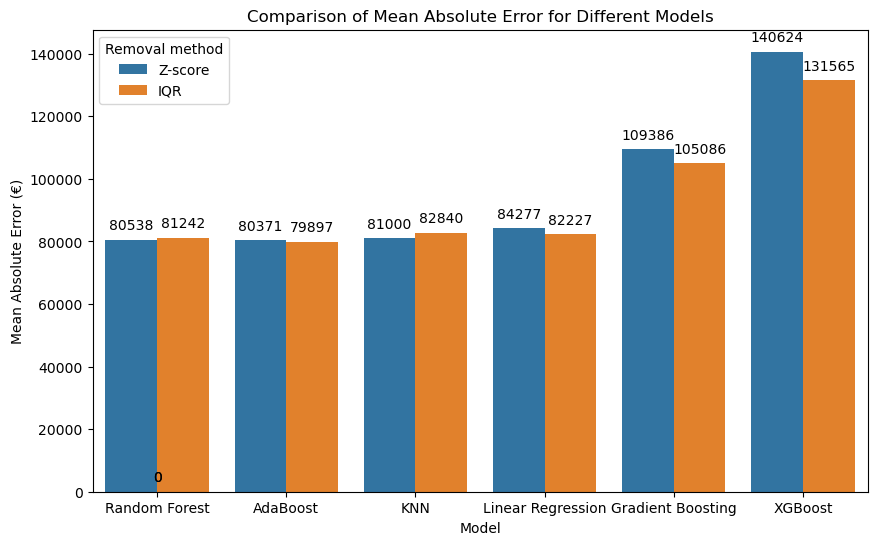

In [790]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Mean Absolute Error', hue='Removal method', data=performance_melted)

# Add titles and labels
plt.title('Comparison of Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (€)')  # Including the euro sign in the y-axis label

# Add value labels on top of each bar without decimals
for p in barplot.patches:
    value = p.get_height()  # Get the height of the bar (i.e., the value)
    barplot.annotate(f'{value:.0f}',  # Format the value to have no decimal places
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

# Display the plot
plt.show()

Mean Absolut Error

In [785]:
# Reset the index to convert the model names from index to a column
performance_df_z = performance_df_z.reset_index().rename(columns={'index': 'Model'})
performance_df_iqr = performance_df_iqr.reset_index().rename(columns={'index': 'Model'})

# Select only the 'Model' and 'MAE' columns
performance_df_z = performance_df_z[['Model', 'Mean Absolute Error']].rename(columns={'Mean Absolute Error': 'Z-score'})
performance_df_iqr = performance_df_iqr[['Model', 'Mean Absolute Error']].rename(columns={'Mean Absolute Error': 'IQR'})

# Merge the dataframes on the 'Model' column
performance_combined = pd.merge(performance_df_z, performance_df_iqr, on='Model')

In [787]:
# Melt the dataframe to have a long format suitable for sns.barplot
performance_melted = pd.melt(performance_combined, id_vars=['Model'], value_vars=['Z-score', 'IQR'],
                             var_name='Removal method', value_name='Mean Absolute Error')

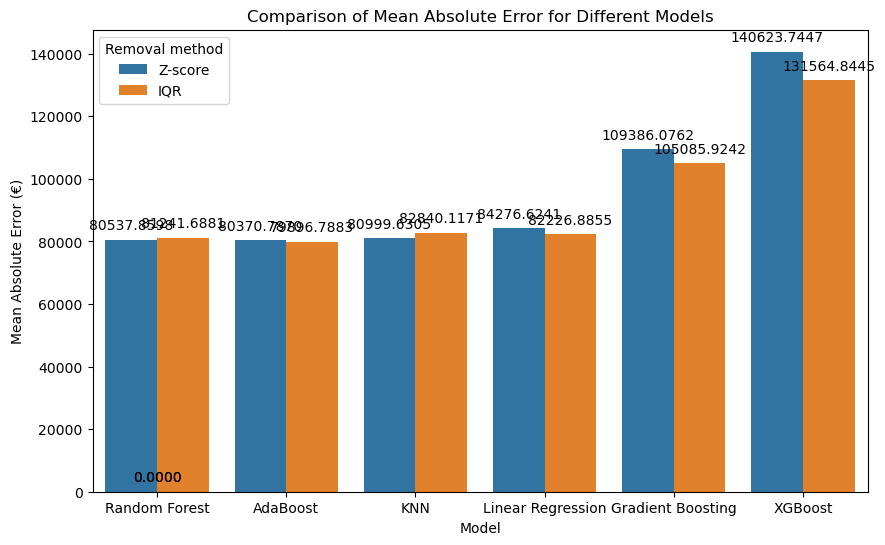

In [788]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the bar plot
barplot = sns.barplot(x='Model', y='Mean Absolute Error', hue='Removal method', data=performance_melted)

# Add titles and labels
plt.title('Comparison of Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (€)')

# Add value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Display the plot
plt.show()

### Feature Engineering for Categorical columns

In [ ]:
# Separate features and target
X = df.drop('energy_label', axis=1)
y = df['energy_label']

# Define categorical and numerical columns
categorical_columns = ['build_type', 'house_type', 'house_type_detail', 'floors', 'position', 'garden']
numerical_columns = ['price', 'living_space_size_(m2)', 'build_year', 'rooms']

In [ ]:
X.head()

,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,position,garden,estimated_neighbourhood_price_per_m2
1,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
2,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,Aan rustige weg en in woonwijk,Achtertuin,1855
3,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190
4,Sassenheim,1050000,423,210,2000,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Schilddak bedekt met pannen,5,2,2,4 woonlagen en een kelder,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1340
5,Oudewater,445000,127,126,2016,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,4,1,1,3 woonlagen,In woonwijk,Achtertuin en voortuin,1745


In [ ]:
# One-hot encoding for sex and title
X = pd.get_dummies(X, columns=['build_type','house_type'])

In [ ]:
X.drop(columns = ["city"], inplace = True)

In [ ]:
X.drop(columns = ["house_type_detail","roof","floors"], inplace = True)

In [ ]:
X.drop(columns = ["position","garden"], inplace = True)

In [ ]:
X.head(3)

,price,lot_size_(m2),living_space_size_(m2),build_year,rooms,toilet,bathroom,estimated_neighbourhood_price_per_m2,build_type_Bestaande bouw,build_type_Nieuwbouw,house_type_Bungalow,house_type_Eengezinswoning,house_type_Grachtenpand,house_type_Herenhuis,house_type_Landhuis,house_type_Villa,house_type_Woonboerderij,house_type_Woonboot
1,425000,181,109,1935,3,1,1,1435,True,False,False,False,False,True,False,False,False,False
2,575000,198,138,1986,4,1,1,1855,True,False,False,True,False,False,False,False,False,False
3,259500,231,92,1989,3,2,1,2190,True,False,False,True,False,False,False,False,False,False


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define models
models = {
  'Logistic Regression': LogisticRegression(random_state=42),
  'Decision Tree': DecisionTreeClassifier(random_state=42),
  'Random Forest': RandomForestClassifier(random_state=42),
  'SVM': SVC(random_state=42),
  'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items(): #we are taking each algorithm
  # Train the model
  model.fit(X_train_scaled, y_train)
  
  # Make predictions
  y_pred = model.predict(X_test_scaled)
  
  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  
  # Store results
  results[name] = {
      'accuracy': accuracy,
      'report': classification_report(y_test, y_pred)
  }

# Print results
for name, result in results.items():
  print(f"\n{name}:")
  print(f"Accuracy: {result['accuracy']:.4f}")
  print("Classification Report:")
  print(result['report'])

# Compare accuracies
accuracies = {name: result['accuracy'] for name, result in results.items()}
best_model = max(accuracies, key=accuracies.get)

print("\nModel Accuracy Comparison:")
for name, accuracy in accuracies.items():
  print(f"{name}: {accuracy:.4f}")

print(f"\nBest performing model: {best_model} with accuracy {accuracies[best_model]:.4f}")

c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gebruiker\anaconda3\envs\env_test\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",


Logistic Regression:
Accuracy: 0.4611
Classification Report:
              precision    recall  f1-score   support

           A       0.62      0.88      0.73       233
          A+       0.00      0.00      0.00        17
         A++       0.00      0.00      0.00         2
        A+++       0.00      0.00      0.00         2
       A++++       0.00      0.00      0.00         1
           B       0.28      0.05      0.08       167
           C       0.41      0.79      0.54       277
           D       0.21      0.10      0.13       112
           E       0.20      0.01      0.02        79
           F       0.17      0.02      0.04        46
           G       0.18      0.07      0.11        40

    accuracy                           0.46       976
   macro avg       0.19      0.18      0.15       976
weighted avg       0.37      0.46      0.37       976


Decision Tree:
Accuracy: 0.3945
Classification Report:
              precision    recall  f1-score   support

           A  

TypeError: 'int' object is not callable

Try it on energy label with Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming X is your DataFrame and 'energy_label' is the column to encode
label_encoder = LabelEncoder()

# Fit and transform the 'energy_label' column
X['energy_label_encoded'] = label_encoder.fit_transform(X['energy_label'])


KeyError: 'energy_label'